# Bike Sharing Assignment - Exploratory Data Analysis


## Step1: Data Sourcing

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def read_csv(file_path):
    """
    Read csv file and return a pandas dataframe

    Parameters
    ----------
    file_path : str
        The path to the csv file

    Returns
    -------
    pandas.DataFrame
        The data from the csv file
    """

    data =  pd.read_csv(file_path, engine='python', encoding='utf-8')
    return data

In [18]:
file_path = "C:/Python Repo/linear-regression-bike-sharing/data/raw_data.csv"
raw_data = read_csv(file_path)
raw_data.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


## Step 2 : EDA

In [52]:
def data_stats(data):
    """
    Print the statistics of the data

    Parameters
    ----------
    data : pandas.DataFrame
        The data to be analyzed
    """

    null_count = (raw_data.isna() == True).sum().sort_values(ascending=False)
    print(f"Null Counts: {null_count} \n\n")

    unique_counts = data.apply(lambda x: x.nunique())
    print(f"Unique Counts: {unique_counts} \n\n")
    non_unique_columns = unique_counts[unique_counts == 1].index
    print(f"Non-Unique Columns: {non_unique_columns} \n\n")

    duplicated_rows = data.duplicated().sum()
    print(f"Duplicated Rows: {duplicated_rows} \n\n")

    print("Column Statistics:")
    for column in data.columns:
        print(raw_data[column].value_counts(ascending=False), "\n\n\n")


In [53]:
# Checking the data imported
print(f"The shape of the data is {raw_data.shape}")
print(raw_data.info())

data_stats(raw_data)

The shape of the data is (730, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB
None
Null Counts: instant       0
dteday        0
season  

In [30]:
# Checking columns and flagging irrelevant columns
raw_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [56]:
round(raw_data['cnt'].mean())

4508

In [71]:
# Check dtypes for all data
raw_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## EDA Findings : 
- Column "cnt" is our target variable with mean 4508
- No null values in the any of the columns.
- No duplicate rows in the data set.
- No columns that has only one value overall for all records
- Columns that could be dropped are 'instant','casual','registered','atemp','dteday'
    - instant : This columns is just a counter that we donot require for analysis
    - casual and regsitered : Both of these columns are to show the type of users , this is irrelevant to our analysis
    - atemp : atemp is adjusted temperature , since we already have temparature we will drop this column
    - dteday : Since we already have day, month and year we donot need date

## Step 3 : Data visualization

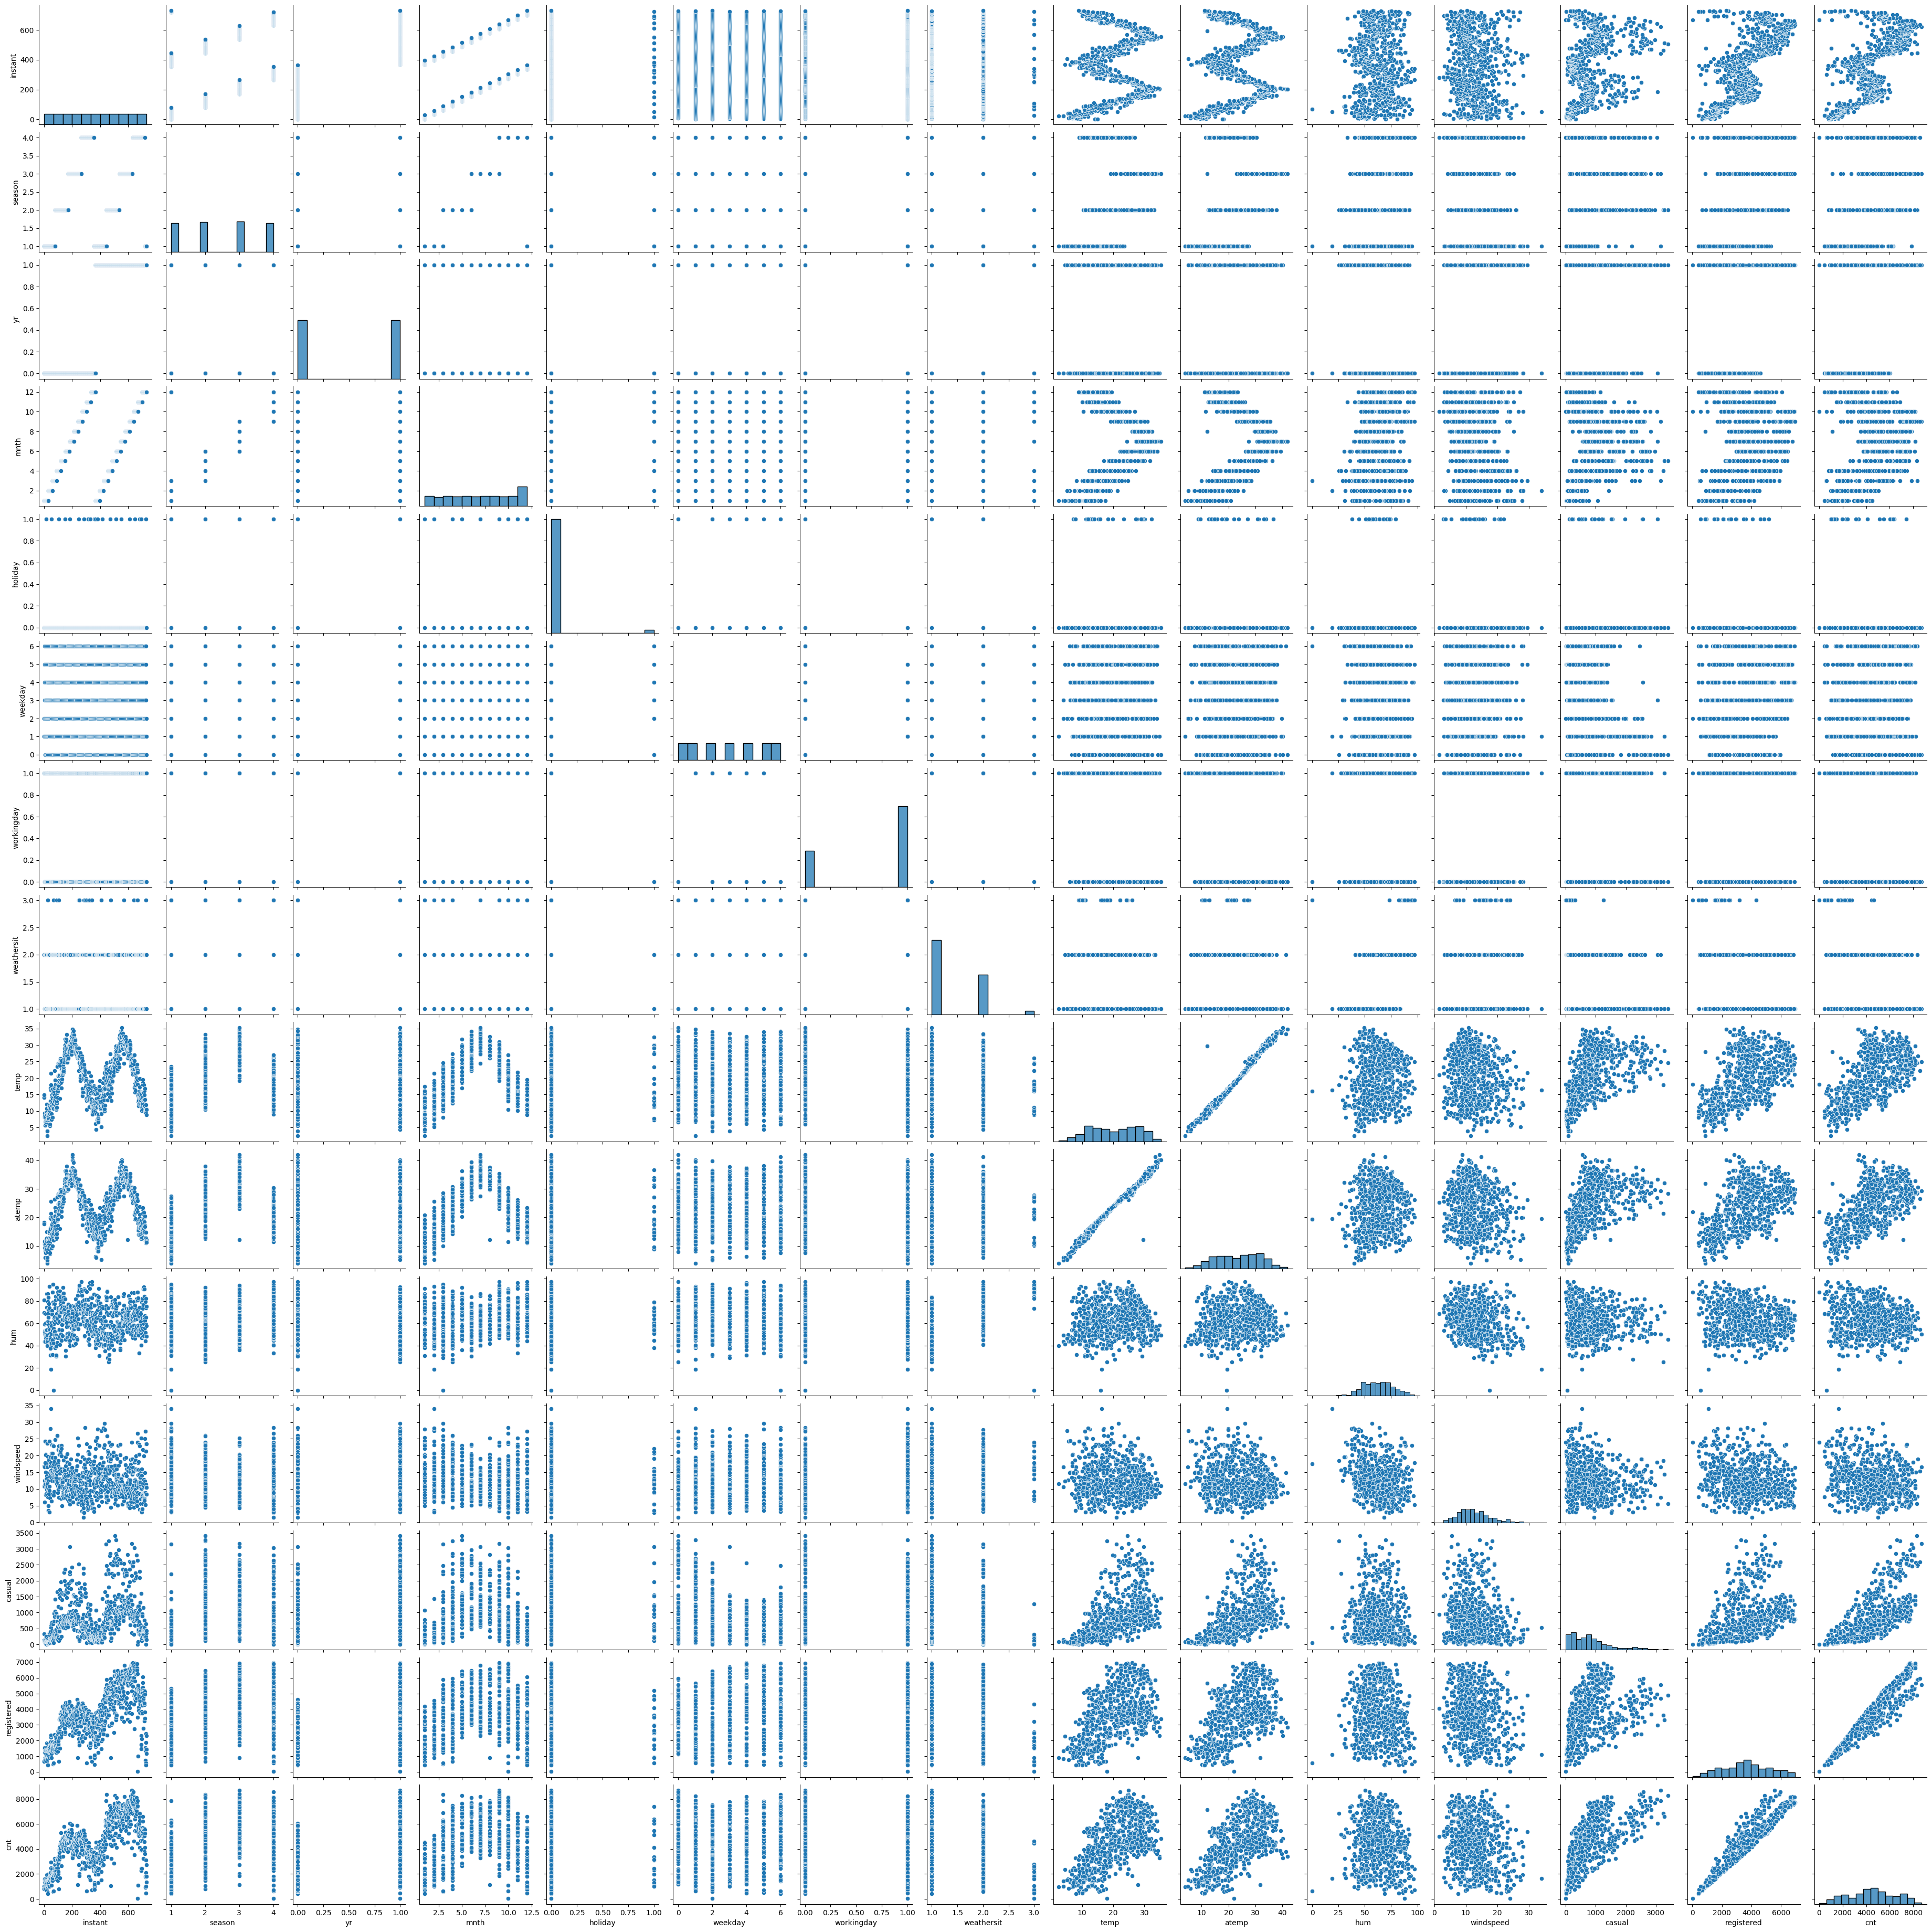

In [69]:
# Plotting scatter plot for all columns
sns.pairplot(raw_data)
plt.show()

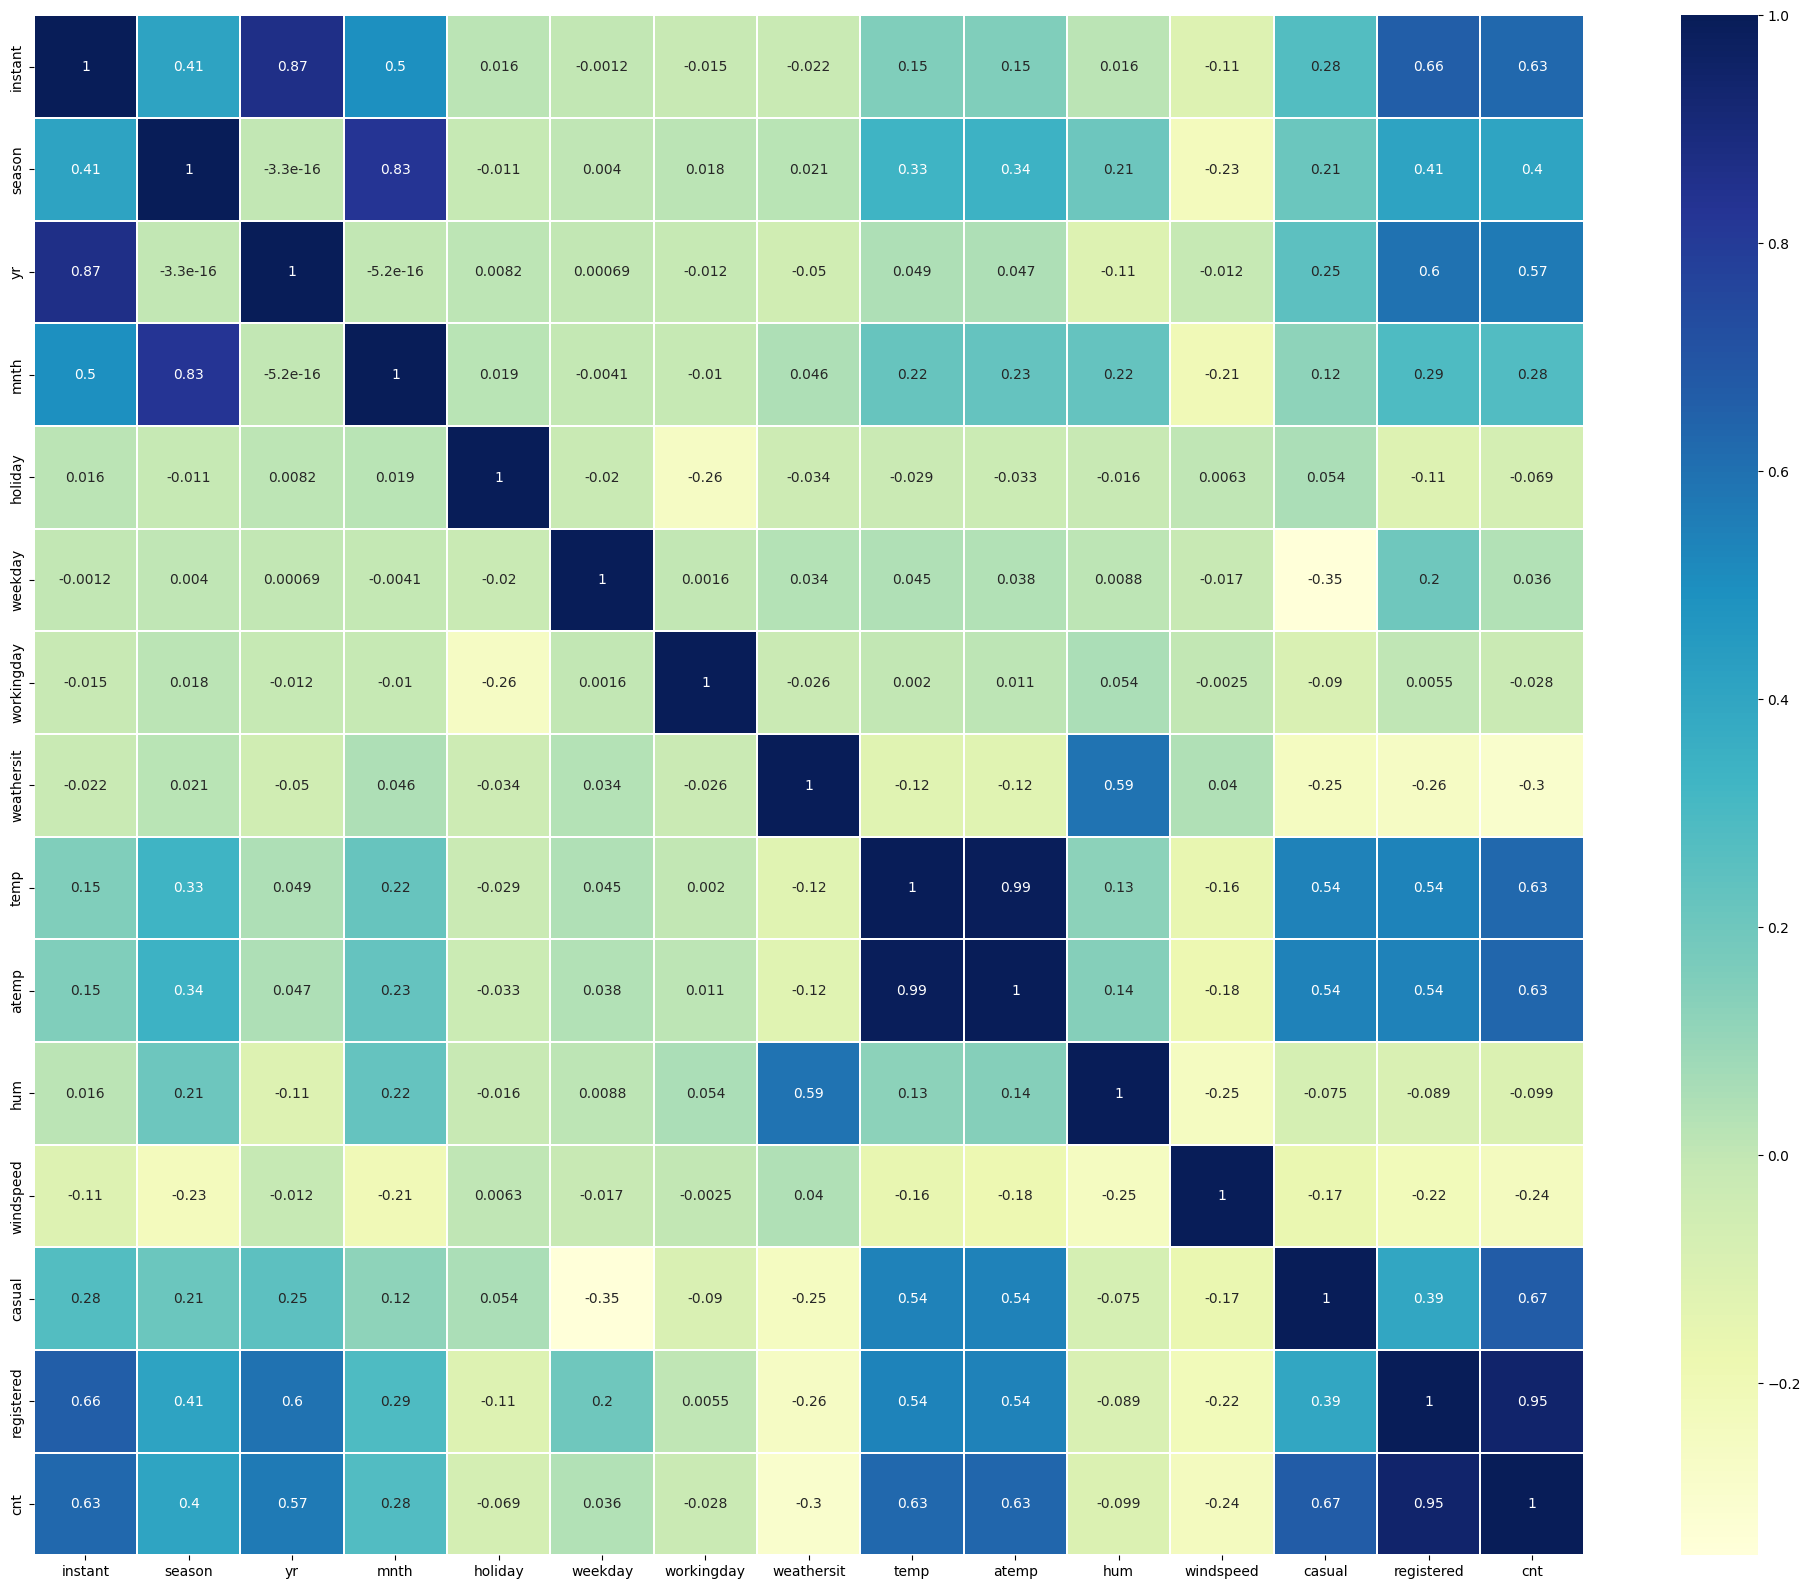

In [70]:
# Plotting correlation heatmat
plt.figure(figsize = (25,20))
sns.heatmap(raw_data.corr(), annot = True,cmap='YlGnBu', linewidths=0.3)
plt.show()

In [67]:
def barplot(column_list):
    """
    Plot a barplot for each column against the target column

    Parameters
    ----------
    column_list : list
        The list of columns to plot
    """

    for column in column_list:
        print(f"Plotting {column} against cnt")
        sns.barplot(x=column, y='cnt', data=raw_data)
        plt.figure(figsize=(10, 7))
        plt.show()

Plotting season against cnt


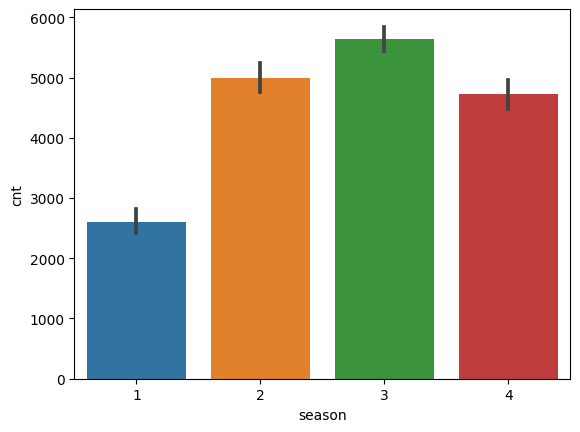

<Figure size 1000x700 with 0 Axes>

Plotting holiday against cnt


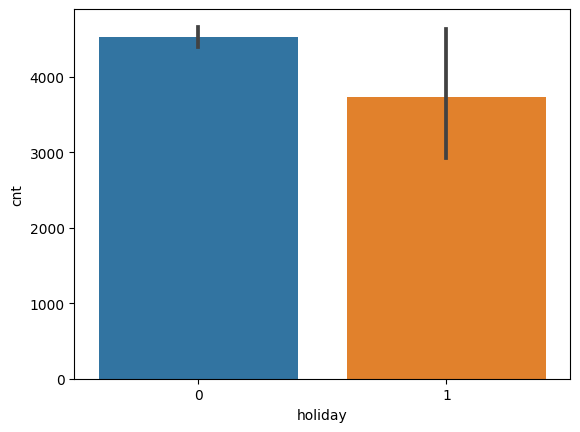

<Figure size 1000x700 with 0 Axes>

Plotting yr against cnt


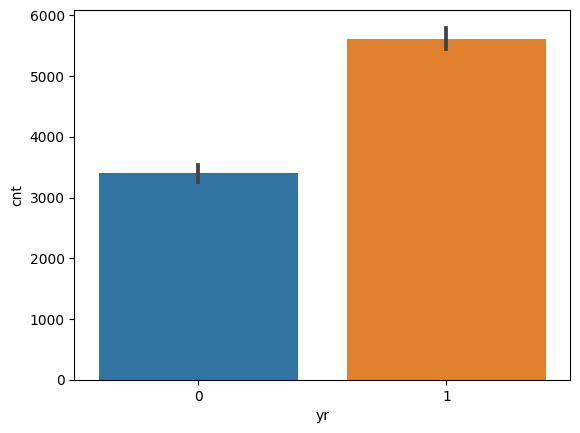

<Figure size 1000x700 with 0 Axes>

Plotting mnth against cnt


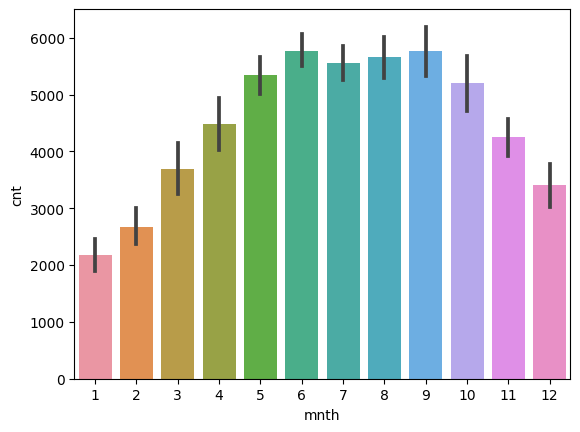

<Figure size 1000x700 with 0 Axes>

Plotting weekday against cnt


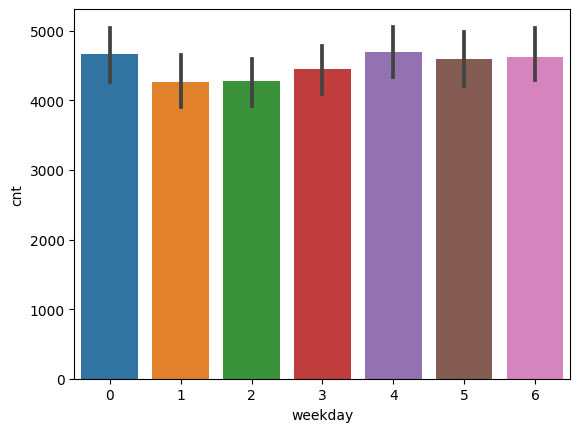

<Figure size 1000x700 with 0 Axes>

Plotting workingday against cnt


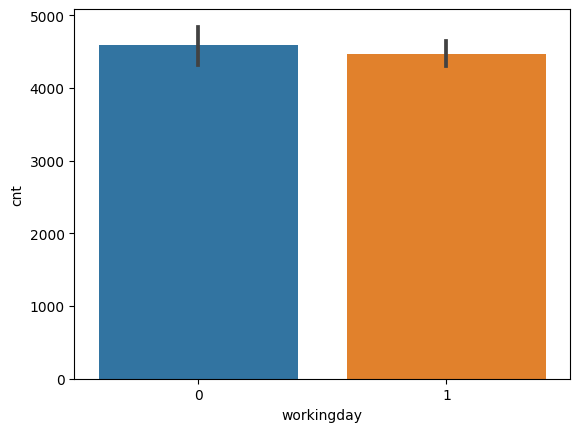

<Figure size 1000x700 with 0 Axes>

Plotting weathersit against cnt


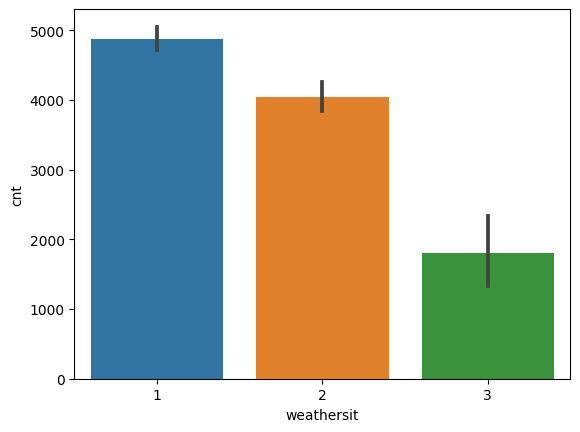

<Figure size 1000x700 with 0 Axes>

In [68]:
# for all these columns call the barplot function to check the distribution of the data
columns_to_plot = ['season', 'holiday', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']
barplot(columns_to_plot)